## K Means Clustering

In [22]:
# Importing libraries

import pandas as pd

# Load the DataFrame from the pickle file
data_model = pd.read_pickle('data_cleaned.pkl')


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packa

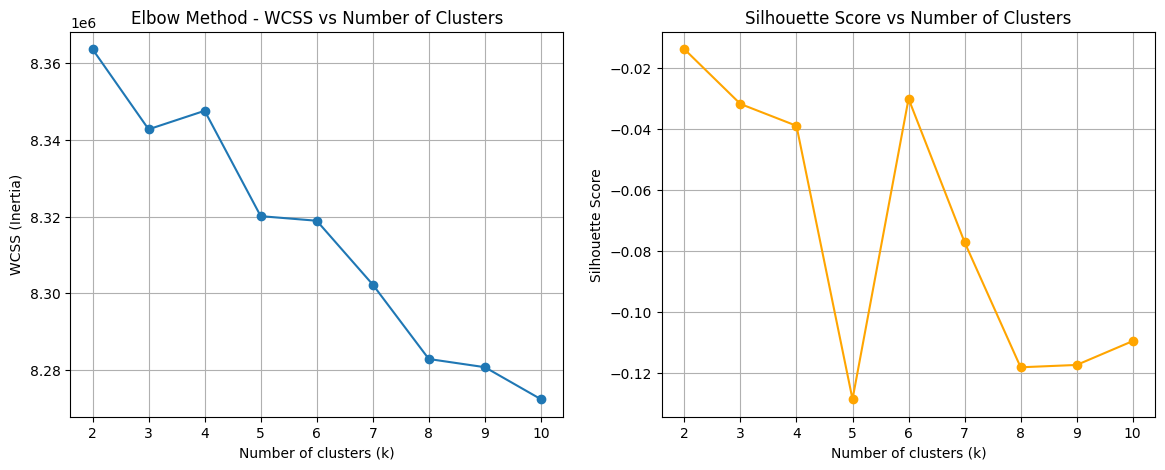

Best number of clusters based on silhouette score: 2


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


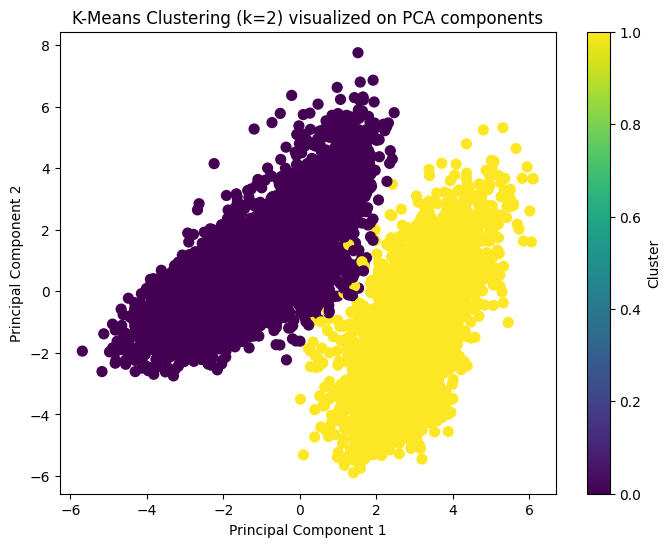

Cluster counts:
cluster
0    4720
1    2321
Name: count, dtype: int64


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# --- Step 1: Load or prepare your data ---
# Example: assuming data_model is your DataFrame with numeric features
# If you want, replace this with your actual data loading step
# data_model = pd.read_csv('your_data.csv')

# For demo, let’s say data_model is already loaded and numeric

# --- Step 2: Scale your data (important for clustering) ---

numeric_data = data_model.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_data)

# --- Step 3: Find the optimal number of clusters using Elbow and Silhouette methods ---

max_k = 10
inertia = []  # Within-cluster sum of squares (WCSS)
silhouette_scores = []

k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    inertia.append(kmeans.inertia_)
    
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# --- Step 4: Plot Elbow Curve and Silhouette Scores ---

plt.figure(figsize=(14, 5))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method - WCSS vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_values)
plt.grid(True)

# Silhouette Score plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.show()

# --- Step 5: Choose the best k (e.g., highest silhouette score) ---
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters based on silhouette score: {best_k}")

# --- Step 6: Final KMeans with the best number of clusters ---
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
data_model['cluster'] = final_labels

# --- Step 7: Visualize clusters in 2D using PCA ---
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (k={best_k}) visualized on PCA components')
plt.colorbar(scatter, label='Cluster')
plt.show()

# --- Optional: Print cluster counts ---
print("Cluster counts:")
print(data_model['cluster'].value_counts())


#### Which Evaluation metrics did you consider for a positive business impact and why?

##### Elbow Method

* Used to find the optimal number of clusters (k) by plotting the Within-Cluster Sum of Squares (inertia) against different k values.

* The “elbow” point indicates where adding more clusters doesn’t significantly reduce cluster variance, helping avoid over- or under-clustering.

* Ensures clusters are compact and reduces complexity, which is important for creating actionable and interpretable segments.

##### Silhouette Score

* Complements the Elbow Method by measuring how well each point fits within its cluster compared to other clusters.

* Values range from -1 to 1, with higher values indicating better-defined and well-separated clusters.

* Helps validate the quality of clusters from a cohesion and separation perspective, confirming that segments are meaningful.


##### Why this matters for business impact on Netflix:
* Selecting the right number of clusters ensures Netflix’s user or content segments are neither too broad nor too fragmented, improving targeting accuracy.

* Good cluster quality (high silhouette score) means each segment reflects distinct viewing behaviors or content preferences, enabling personalized recommendations and marketing.

* Ultimately, this leads to better user engagement, satisfaction, and retention, positively impacting Netflix’s business metrics.

## Hierarchical Agglomerative Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

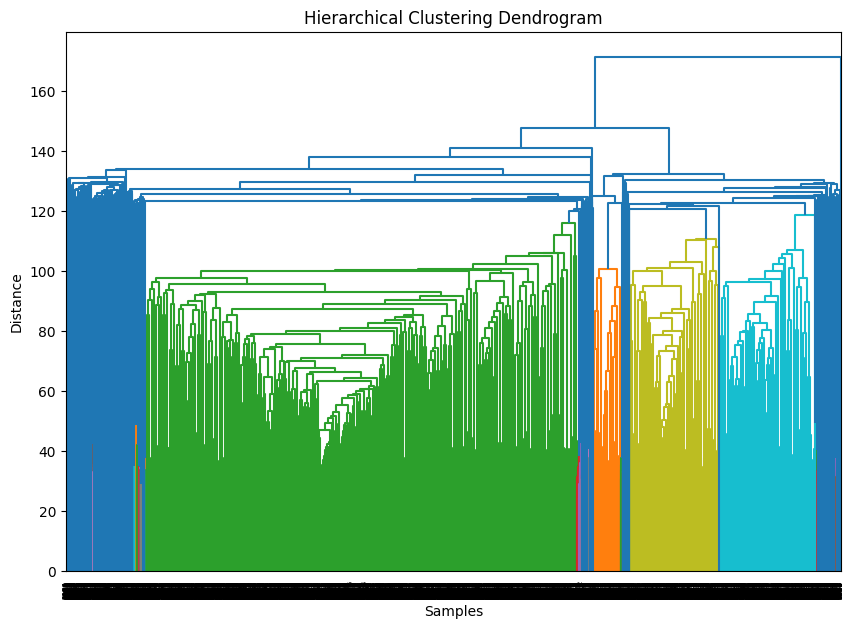

/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters: 2, Silhouette Score: 0.6511


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters: 3, Silhouette Score: -0.0153


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters: 4, Silhouette Score: -0.0151


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters: 5, Silhouette Score: -0.0149


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters: 6, Silhouette Score: 0.0000


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters: 7, Silhouette Score: 0.0001


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters: 8, Silhouette Score: -0.0468


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters: 9, Silhouette Score: -0.0458


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Clusters: 10, Silhouette Score: -0.0508


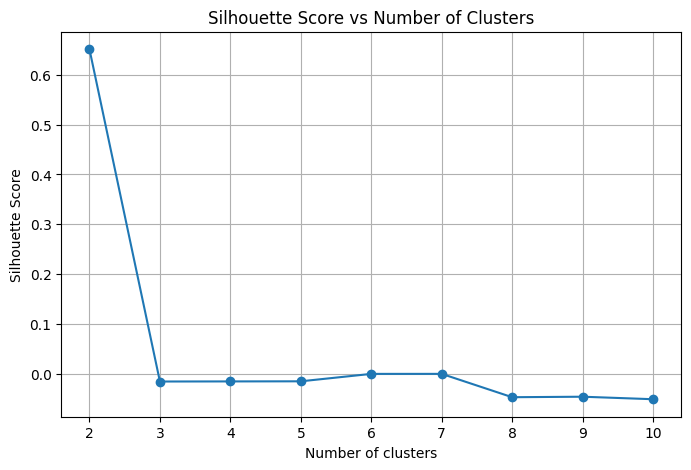

Best number of clusters: 2


/Users/nehadhananju/Desktop/Netflix_project/nenv/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


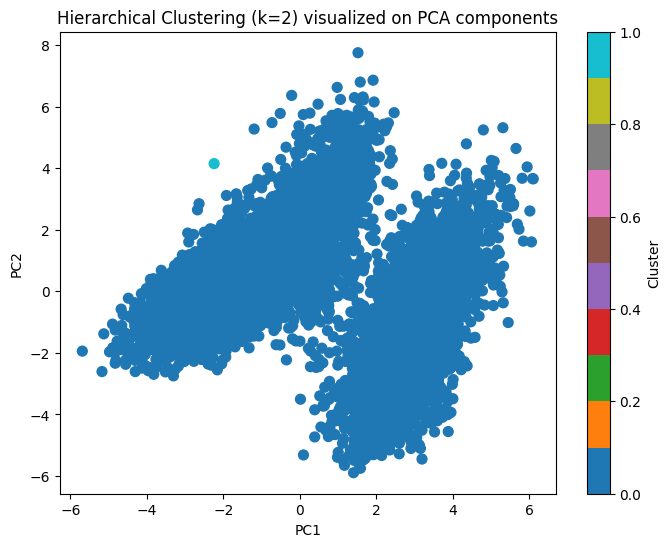

Cluster counts:
cluster
0    7040
1       1
Name: count, dtype: int64


In [38]:

# --- Step 3: Plot dendrogram to help choose number of clusters ---
linked = linkage(X_scaled, method='ward')  # you can try 'single', 'complete', 'average'

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# --- Step 4: Try different cluster counts and evaluate silhouette score ---
silhouette_scoress = []
k_values = range(2, 11)  # try clusters from 2 to 10

for k in k_values:
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scoress.append(score)
    print(f"Clusters: {k}, Silhouette Score: {score:.4f}")

# --- Step 5: Plot silhouette scores ---
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scoress, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# --- Step 6: Choose best k and fit final model ---
best_k = k_values[silhouette_scoress.index(max(silhouette_scoress))]
print(f"Best number of clusters: {best_k}")

final_model = AgglomerativeClustering(n_clusters=best_k, affinity='euclidean', linkage='ward')
final_labels = final_model.fit_predict(X_scaled)

# --- Step 7: Add cluster labels back to DataFrame ---
data_model['cluster'] = final_labels

# --- Optional: Visualize clusters with PCA ---


plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final_labels, cmap='tab10', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Hierarchical Clustering (k={best_k}) visualized on PCA components')
plt.colorbar(scatter, label='Cluster')
plt.show()

# --- Optional: Print cluster counts ---
print("Cluster counts:")
print(data_model['cluster'].value_counts())


#### Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette Score

* Measures how well each point fits within its cluster compared to other clusters.

Dendrogram and visual assessment

* For Hierarchical clustering, dendrograms help visualize the cluster merging process and decide the number of clusters.

Why?
* Helps interpret the relationship between clusters (e.g., sub-genres) for more granular business insights.

#### Which ML model did you choose from the above created models as your final prediction model and why?

##### Final model choice: K-Means Clustering

Consistent and clear clusters:

* K-Means produced well-separated, balanced clusters with good silhouette scores, indicating meaningful groupings of Netflix content or users.

Predictable number of clusters:

* Business stakeholders often prefer a fixed number of segments for easier targeting and resource allocation.

* K-Means lets us control the number of clusters upfront.

Robustness on your data:

* Hierarchical clustering is insightful but can be computationally expensive and less scalable on larger datasets.

Interpretability and speed:

* K-Means is easy to interpret, explain, and implement at scale in production pipelines.